# Explore DRAPER Satellite Image Data

## Problem Statement

Training data folder consists of satellite images daily taken from day one to day five. Test data folder consists of five sets of random images of the same place. The model has to use the train data and learn the pattern of images taken daily, and arrange the images of each set in the test folder.

This notebook will go through some exploratory analysis of the images in the training dataset.

In [20]:
import cv2
import numpy as np
import sys
from math import atan2, degrees, pi
from skimage.data import camera
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import PIL
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
img1 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_1.jpeg',1)
img2 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_2.jpeg',1)
img3 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_3.jpeg',1)
img4 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_4.jpeg',1)
img5 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_5.jpeg',1)

In [5]:
print "Shape of RGB image is ", img1.shape
print "Size of RGB image is ", img1.size

Shape of RGB image is  (2329, 3100, 3)
Size of RGB image is  21659700


Reading the image in grayscale

In [6]:
img_gs = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_1.jpeg',0)

In [7]:
print "Shape of Grayscale image is ", img_gs.shape
print "Size of Grayscale image is ", img_gs.size

Shape of Grayscale image is  (2329, 3100)
Size of Grayscale image is  7219900


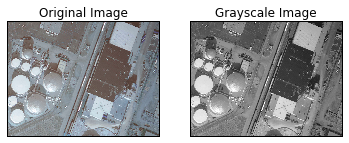

In [19]:
plt.subplot(121),plt.imshow(img1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gs,cmap = 'gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])

plt.show()

#### This function will reduce the size of the images

In [12]:
basewidth = 300
 img = Image.open('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_1.jpeg')
 wpercent = (basewidth / float(img.size[0]))
 hsize = int((float(img.size[1]) * float(wpercent)))
 img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
 img.save('175-1-sm.jpg')

In [14]:
img_sm = cv2.imread('175-1-sm.jpg')

print "Size of the reduced RGB image is ", img_sm.size
print "Shape of the reduced RGB image is ", img_sm.shape

img_sm_gs = cv2.imread('175-1-sm.jpg', 0)

print "Size of the Grayscale image is ", img_sm_gs.size
print "Shape of the Grayscale image is ", img_sm_gs.shape

Size of the reduced RGB image is  202500
Shape of the reduced RGB image is  (225, 300, 3)
Size of the Grayscale image is  67500
Shape of the Grayscale image is  (225, 300)


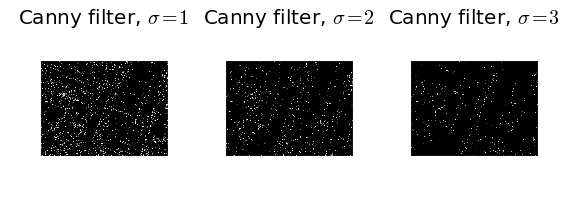

In [25]:
edges1 = feature.canny(img_gs)
edges2 = feature.canny(img_gs, sigma=2)
edges3 = feature.canny(img_gs, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(edges1, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax2.imshow(edges2, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=2$', fontsize=20)

ax3.imshow(edges3, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

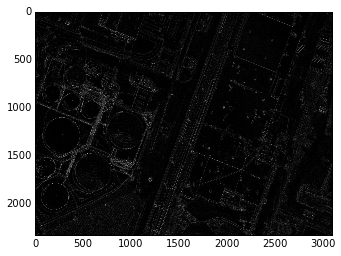

In [27]:
edge_sobel = sobel(img_gs)

plt.imshow(edge_sobel, cmap=plt.cm.gray)
plt.show()

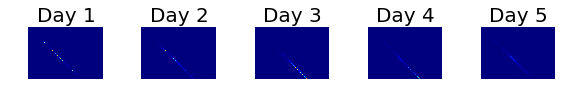

In [43]:
hist1 = cv2.calcHist(img1, [0, 1], None, [180, 256], [0, 180, 0, 256])
hist2 = cv2.calcHist(img2, [0, 1], None, [180, 256], [0, 180, 0, 256])
hist3 = cv2.calcHist(img3, [0, 1], None, [180, 256], [0, 180, 0, 256])
hist4 = cv2.calcHist(img4, [0, 1], None, [180, 256], [0, 180, 0, 256])
hist5 = cv2.calcHist(img5, [0, 1], None, [180, 256], [0, 180, 0, 256])

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(8, 3))



ax1.imshow(hist1,interpolation = 'nearest')
ax1.axis('off')
ax1.set_title('Day 1', fontsize=20)

ax2.imshow(hist2,interpolation = 'nearest')
ax2.axis('off')
ax2.set_title('Day 2', fontsize=20)

ax3.imshow(hist3,interpolation = 'nearest')
ax3.axis('off')
ax3.set_title('Day 3', fontsize=20)

ax4.imshow(hist4,interpolation = 'nearest')
ax4.axis('off')
ax4.set_title('Day 4', fontsize=20)

ax5.imshow(hist5,interpolation = 'nearest')
ax5.axis('off')
ax5.set_title('Day 5', fontsize=20)

fig.tight_layout()

plt.show()

In [54]:
surf = cv2.SURF(600)
surf.hessianThreshold = 1000
kp1, des1 = surf.detectAndCompute(img1, None)
kp2, des2 = surf.detectAndCompute(img2, None)
kp3, des3 = surf.detectAndCompute(img3, None)
kp4, des4 = surf.detectAndCompute(img4, None)
kp5, des5 = surf.detectAndCompute(img5, None)

In [55]:
surf1 = cv2.drawKeypoints(img1, kp1, None, (255,0,0),4)
surf2 = cv2.drawKeypoints(img2, kp2, None, (255,0,0),4)
surf3 = cv2.drawKeypoints(img3, kp3, None, (255,0,0),4)
surf4 = cv2.drawKeypoints(img4, kp4, None, (255,0,0),4)
surf5 = cv2.drawKeypoints(img5, kp5, None, (255,0,0),4)

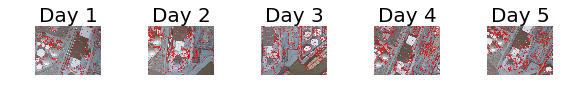

In [58]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(8, 3))


ax1.imshow(surf1)
ax1.axis('off')
ax1.set_title('Day 1', fontsize=20)

ax2.imshow(surf2)
ax2.axis('off')
ax2.set_title('Day 2', fontsize=20)

ax3.imshow(surf3)
ax3.axis('off')
ax3.set_title('Day 3', fontsize=20)

ax4.imshow(surf4)
ax4.axis('off')
ax4.set_title('Day 4', fontsize=20)

ax5.imshow(surf5)
ax5.axis('off')
ax5.set_title('Day 5', fontsize=20)

fig.tight_layout()

plt.show()

In [ ]:
edges = cv2.Canny(gray,100,300,apertureSize = 3)
plt.imshow(edges)